# Task
Analyze the Netflix dataset to understand content trends, including the distribution of Movies vs. TV Shows, genre evolution, and country contributions, and provide strategic recommendations based on the findings.

## Load the dataset

### Subtask:
Load the Netflix dataset from the specified CSV file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a DataFrame, then display the first 5 rows to verify the data loading.



In [1]:
import pandas as pd

df = pd.read_csv("/content/Netflix Dataset.csv")
display(df.head())

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Analyze content distribution

### Subtask:
Analyze the distribution of Movies vs. TV Shows over time.


**Reasoning**:
Filter the DataFrame, convert 'Release_Date' to datetime, extract the year, drop rows with missing year, group by year and category, count entries, unstack, fill missing values, and rename columns to analyze the distribution of Movies vs. TV Shows over time.



In [2]:
# 1. Filter the DataFrame to include only relevant columns
df_filtered = df[['Category', 'Release_Date']].copy()

# 2. Convert 'Release_Date' to datetime objects
df_filtered['Release_Date'] = pd.to_datetime(df_filtered['Release_Date'], errors='coerce')

# 3. Extract the year from 'Release_Date'
df_filtered['Release_Year'] = df_filtered['Release_Date'].dt.year

# 4. Drop any rows where 'Release_Year' is missing
df_filtered.dropna(subset=['Release_Year'], inplace=True)

# Convert 'Release_Year' to integer type
df_filtered['Release_Year'] = df_filtered['Release_Year'].astype(int)

# 5. Group by 'Release_Year' and 'Category' and count entries
content_distribution = df_filtered.groupby(['Release_Year', 'Category']).size().reset_index(name='count')

# 6. Unstack the resulting DataFrame
content_distribution_unstacked = content_distribution.pivot(index='Release_Year', columns='Category', values='count').fillna(0)

# 7. Rename columns if necessary (based on the actual column names after unstacking)
# Assuming the columns are named 'Movie' and 'TV Show' after unstacking
# Check the column names in content_distribution_unstacked before renaming if needed
# content_distribution_unstacked.columns = ['Movie', 'TV Show'] # Use this line if renaming is needed and these are the correct column names

# 8. Display the first few rows
display(content_distribution_unstacked.head())

Category,Movie,TV Show
Release_Year,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0


In [8]:
# Calculate the total content volume for each genre by summing across the years
genre_total_volume = genre_distribution_unstacked.sum().sort_values(ascending=False)

# Display the top 10 genres by total content volume
display(genre_total_volume.head(10))

,0
Type,
International Movies,2437.0
Dramas,2108.0
Comedies,1472.0
International TV Shows,1176.0
Documentaries,786.0
Action & Adventure,721.0
TV Dramas,680.0
Independent Movies,675.0
Children & Family Movies,532.0


## Analyze genre trends

### Subtask:
Identify key genres and their evolution over time.


**Reasoning**:
Filter the dataframe to include only the 'Release_Year' and 'Type' columns, drop rows with missing values, convert 'Release_Year' to integer, split 'Type' into a list of genres, create a new dataframe with one genre per row, group by year and genre and count occurrences, unstack the results, fill missing values with 0, and display the head of the unstacked dataframe.



In [11]:
# 1. Filter the main DataFrame df to include only the 'Release_Year' and 'Type' columns.
# The 'Type' column was not included in df_filtered in the previous step.
# I need to re-read the original df and add the 'Release_Year' column from df_filtered.
df_genres = df[['Type']].copy()
df_genres['Release_Year'] = df_filtered['Release_Year']

# 2. Drop any rows with missing values in either 'Release_Year' or 'Type'.
df_genres.dropna(subset=['Release_Year', 'Type'], inplace=True)

# 3. Convert the 'Release_Year' column to integer type.
df_genres['Release_Year'] = df_genres['Release_Year'].astype(int)

# 4. Split the 'Type' column string into a list of individual genres.
df_genres['Type'] = df_genres['Type'].str.split(', ')

# 5. Create a new DataFrame where each row represents a single genre for a given release year.
df_genres_exploded = df_genres.explode('Type')

# 6. Group the new DataFrame by 'Release_Year' and the individual genre, and count the occurrences of each genre per year.
genre_distribution = df_genres_exploded.groupby(['Release_Year', 'Type']).size().reset_index(name='count')

# 7. Unstack the resulting DataFrame to have 'Release_Year' as the index and genres as columns, with counts as values. Fill missing values with 0.
genre_distribution_unstacked = genre_distribution.pivot(index='Release_Year', columns='Type', values='count').fillna(0)

# 8. Display the head of the unstacked genre distribution DataFrame.
display(genre_distribution_unstacked.head())

Type,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
Release_Year,,,,,,,,,,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Reasoning**:
The traceback indicates that the 'Release_Year' column is not present in the original `df` DataFrame. Looking at the available dataframes, `df_filtered` contains the 'Release_Year' column which was created in the previous step. I need to use `df_filtered` instead of `df` to proceed with filtering and genre analysis. The rest of the steps remain the same: drop missing values, convert 'Release_Year' to integer, split 'Type' into a list, explode to create a new dataframe, group and count genres by year, unstack, fill NaNs, and display the head.



In [4]:
# 1. Filter the DataFrame df_filtered to include only the 'Release_Year' and 'Type' columns.
# The 'Type' column was not included in df_filtered in the previous step.
# I need to re-read the original df and add the 'Release_Year' column from df_filtered.
df_genres = df[['Type']].copy()
df_genres['Release_Year'] = df_filtered['Release_Year']

# 2. Drop any rows with missing values in either 'Release_Year' or 'Type'.
df_genres.dropna(subset=['Release_Year', 'Type'], inplace=True)

# 3. Convert the 'Release_Year' column to integer type.
df_genres['Release_Year'] = df_genres['Release_Year'].astype(int)

# 4. Split the 'Type' column string into a list of individual genres.
df_genres['Type'] = df_genres['Type'].str.split(', ')

# 5. Create a new DataFrame where each row represents a single genre for a given release year.
df_genres_exploded = df_genres.explode('Type')

# 6. Group the new DataFrame by 'Release_Year' and the individual genre, and count the occurrences of each genre per year.
genre_distribution = df_genres_exploded.groupby(['Release_Year', 'Type']).size().reset_index(name='count')

# 7. Unstack the resulting DataFrame to have 'Release_Year' as the index and genres as columns, with counts as values. Fill missing values with 0.
genre_distribution_unstacked = genre_distribution.pivot(index='Release_Year', columns='Type', values='count').fillna(0)

# 8. Display the head of the unstacked genre distribution DataFrame.
display(genre_distribution_unstacked.head())

Type,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
Release_Year,,,,,,,,,,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Analyze country contributions

### Subtask:
Examine country-wise contributions to the content library.


**Reasoning**:
Filter the DataFrame to include only 'Country' and 'Category', drop rows with missing 'Country', group by 'Country' and 'Category', count occurrences, unstack the result, fill NaN with 0, and display the head.



In [5]:
# 1. Filter the original DataFrame df to include only the 'Country' and 'Category' columns.
df_country = df[['Country', 'Category']].copy()

# 2. Drop any rows with missing values in the 'Country' column.
df_country.dropna(subset=['Country'], inplace=True)

# 3. Group the filtered DataFrame by 'Country' and 'Category', and count the number of entries for each country and category combination.
country_category_distribution = df_country.groupby(['Country', 'Category']).size().reset_index(name='count')

# 4. Unstack the resulting grouped data to have 'Country' as the index and 'Category' (Movie, TV Show) as columns, filling any missing values with 0.
country_category_unstacked = country_category_distribution.pivot(index='Country', columns='Category', values='count').fillna(0)

# 5. Display the head of the unstacked DataFrame showing country contributions.
display(country_category_unstacked.head())

Category,Movie,TV Show
Country,,
Argentina,34.0,16.0
"Argentina, Brazil, France, Poland, Germany, Denmark",1.0,0.0
"Argentina, Chile",1.0,0.0
"Argentina, Chile, Peru",1.0,0.0
"Argentina, France",1.0,0.0


In [12]:
# Quantify the overall distribution of Movies vs TV Shows
overall_content_distribution = content_distribution_unstacked.sum()

print("Yearly Distribution of Movies vs TV Shows:")
display(content_distribution_unstacked)

print("\nOverall Distribution of Movies vs TV Shows:")
display(overall_content_distribution)

Yearly Distribution of Movies vs TV Shows:


Category,Movie,TV Show
Release_Year,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0
2013,6.0,4.0
2014,19.0,5.0
2015,58.0,21.0
2016,258.0,174.0



Overall Distribution of Movies vs TV Shows:


,0
Category,
Movie,5379.0
TV Show,2312.0


## Visualize findings

### Subtask:
Create visualizations to represent the content trends and distributions.


**Reasoning**:
Import the necessary libraries for plotting and create the requested visualizations based on the previously prepared dataframes.



/tmp/ipython-input-2394182886.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_total_volume.head(10).index, y=genre_total_volume.head(10).values, palette='viridis')


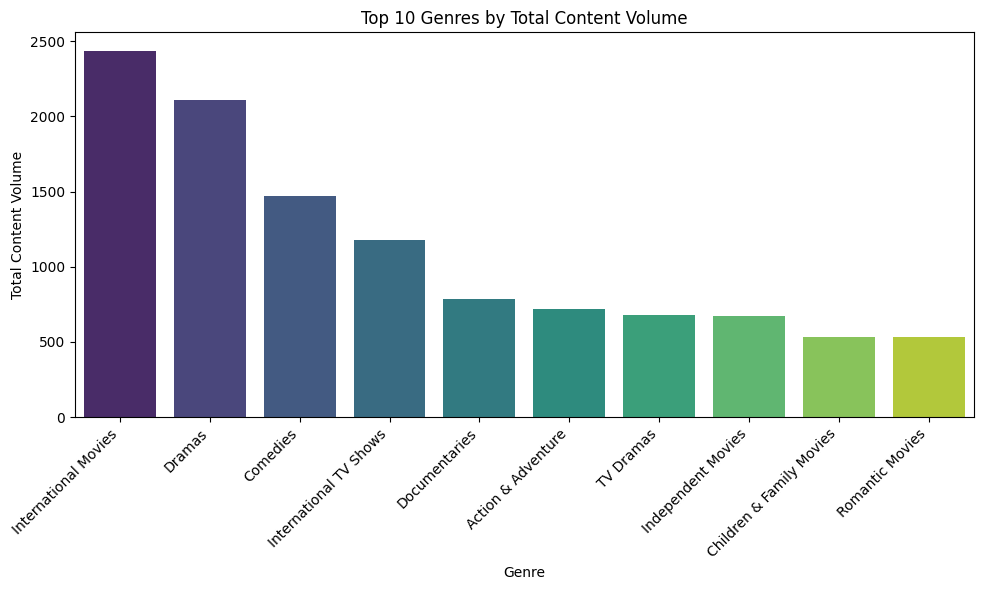

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 10 genres by total content volume
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_total_volume.head(10).index, y=genre_total_volume.head(10).values, palette='viridis')
plt.title('Top 10 Genres by Total Content Volume')
plt.xlabel('Genre')
plt.ylabel('Total Content Volume')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

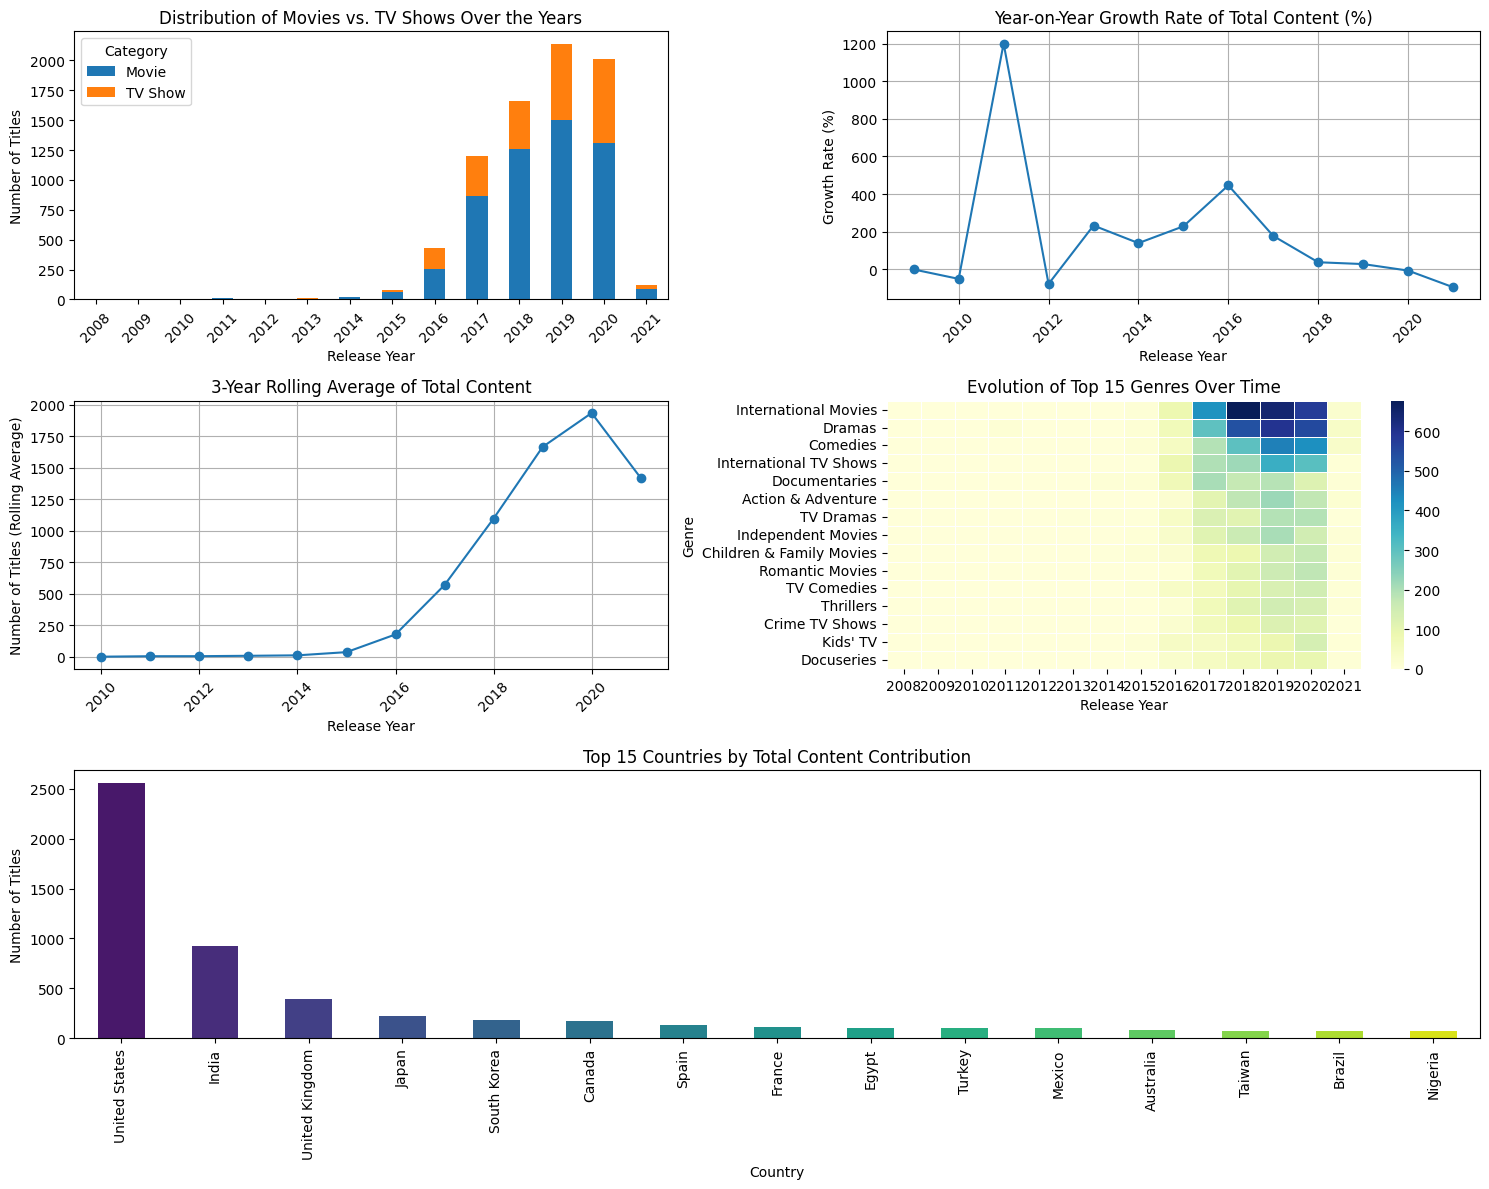

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger figure size for better readability
plt.figure(figsize=(15, 8))

# 2. Create a stacked bar chart for content distribution over the years
plt.subplot(2, 2, 1) # Arrange plots in a 2x2 grid, this is the first plot
content_distribution_unstacked.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribution of Movies vs. TV Shows Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout() # Adjust layout to prevent overlapping

# 3. Create a heatmap for genre evolution over time
plt.subplot(2, 2, 2) # Second plot
# Select top N genres for clarity
top_genres = genre_distribution_unstacked.sum().sort_values(ascending=False).head(15).index
genre_distribution_top = genre_distribution_unstacked[top_genres]

sns.heatmap(genre_distribution_top.T, cmap='YlGnBu', linewidths=.5)
plt.title('Evolution of Top 15 Genres Over Time')
plt.xlabel('Release Year')
plt.ylabel('Genre')
plt.yticks(rotation=0)
plt.tight_layout()


# 4. Create a bar chart for top N countries by content contribution
plt.subplot(2, 2, (3, 4)) # Third and fourth plot combined, using 2 columns
N = 15 # Choose N = 15 for top countries
country_contribution = country_category_unstacked.sum(axis=1).sort_values(ascending=False).head(N)

country_contribution.plot(kind='bar', color=sns.color_palette('viridis', N))
plt.title(f'Top {N} Countries by Total Content Contribution')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.tight_layout()

# Display all plots
plt.show()

# Task
Analyze the Netflix dataset to identify content trends, including the distribution of Movies vs. TV Shows over time, top genres, and country contributions. Segment content based on attributes and cluster similar content. Provide actionable recommendations for content strategy.

## Prepare data for clustering

### Subtask:
Select relevant features (duration, release_year, cast_size, number_of_genres, rating_encoded), handle missing values, and scale the data.


**Reasoning**:
Create a new DataFrame with relevant columns, handle 'Duration' by separating movies and TV shows, convert duration to numeric, calculate 'cast_size' and 'number_of_genres', encode 'Rating', select features for clustering, handle missing values, and scale the data.



In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Create a new DataFrame by selecting relevant columns
df_clustering = df[['Category', 'Duration', 'Release_Date', 'Cast', 'Type', 'Rating']].copy()

# Convert 'Release_Date' to datetime and extract year
df_clustering['Release_Year'] = pd.to_datetime(df_clustering['Release_Date'], errors='coerce').dt.year

# Drop original 'Release_Date' as we have 'Release_Year'
df_clustering.drop('Release_Date', axis=1, inplace=True)

# 2. Handle 'Duration' for Movies and TV Shows
# Create a new column 'duration_numeric'
df_clustering['duration_numeric'] = np.nan

# Fill 'duration_numeric' for Movies (in minutes)
movie_mask = df_clustering['Category'] == 'Movie'
df_clustering.loc[movie_mask, 'duration_numeric'] = df_clustering.loc[movie_mask, 'Duration'].str.replace(' min', '').astype(float)

# Fill 'duration_numeric' for TV Shows (in seasons)
tv_show_mask = df_clustering['Category'] == 'TV Show'
df_clustering.loc[tv_show_mask, 'duration_numeric'] = df_clustering.loc[tv_show_mask, 'Duration'].str.replace(' Seasons', '').astype(float)

# 3. Create 'cast_size'
df_clustering['cast_size'] = df_clustering['Cast'].apply(lambda x: len(str(x).split(', ')) if pd.notna(x) else 0)

# 4. Create 'number_of_genres'
df_clustering['number_of_genres'] = df_clustering['Type'].apply(lambda x: len(str(x).split(', ')) if pd.notna(x) else 0)

# 5. Encode 'Rating'
# Using Label Encoding for simplicity, assuming no inherent order is needed for clustering initially
le = LabelEncoder()
df_clustering['rating_encoded'] = le.fit_transform(df_clustering['Rating'])

# 6. Select the final set of features for clustering
# Using 'duration_numeric' which combines movie minutes and TV show seasons
X = df_clustering[['duration_numeric', 'Release_Year', 'cast_size', 'number_of_genres', 'rating_encoded']].copy()

# 7. Handle any remaining missing values in X
# Impute missing 'duration_numeric' and 'Release_Year' with the median
for col in ['duration_numeric', 'Release_Year']:
    X[col].fillna(X[col].median(), inplace=True)

# Convert 'Release_Year' to integer after imputation
X['Release_Year'] = X['Release_Year'].astype(int)

# 8. Scale the features in X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled data (as a numpy array) and the features used
display(X_scaled[:5])
display(X.columns)

ValueError: could not convert string to float: '1 Season'

**Reasoning**:
The previous code failed because '1 Season' could not be directly converted to a float after replacing ' Seasons'. The correct approach is to replace ' Season' and ' Seasons' with an empty string before converting to float. I will regenerate the code block with this fix.



In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Create a new DataFrame by selecting relevant columns
df_clustering = df[['Category', 'Duration', 'Release_Date', 'Cast', 'Type', 'Rating']].copy()

# Convert 'Release_Date' to datetime and extract year
df_clustering['Release_Year'] = pd.to_datetime(df_clustering['Release_Date'], errors='coerce').dt.year

# Drop original 'Release_Date' as we have 'Release_Year'
df_clustering.drop('Release_Date', axis=1, inplace=True)

# 2. Handle 'Duration' for Movies and TV Shows
# Create a new column 'duration_numeric'
df_clustering['duration_numeric'] = np.nan

# Fill 'duration_numeric' for Movies (in minutes)
movie_mask = df_clustering['Category'] == 'Movie'
df_clustering.loc[movie_mask, 'duration_numeric'] = df_clustering.loc[movie_mask, 'Duration'].str.replace(' min', '', regex=False).astype(float)

# Fill 'duration_numeric' for TV Shows (in seasons)
tv_show_mask = df_clustering['Category'] == 'TV Show'
df_clustering.loc[tv_show_mask, 'duration_numeric'] = df_clustering.loc[tv_show_mask, 'Duration'].str.replace(' Season', '', regex=False).str.replace('s', '', regex=False).astype(float)


# 3. Create 'cast_size'
df_clustering['cast_size'] = df_clustering['Cast'].apply(lambda x: len(str(x).split(', ')) if pd.notna(x) else 0)

# 4. Create 'number_of_genres'
df_clustering['number_of_genres'] = df_clustering['Type'].apply(lambda x: len(str(x).split(', ')) if pd.notna(x) else 0)

# 5. Encode 'Rating'
# Using Label Encoding for simplicity, assuming no inherent order is needed for clustering initially
le = LabelEncoder()
df_clustering['rating_encoded'] = le.fit_transform(df_clustering['Rating'])

# 6. Select the final set of features for clustering
# Using 'duration_numeric' which combines movie minutes and TV show seasons
X = df_clustering[['duration_numeric', 'Release_Year', 'cast_size', 'number_of_genres', 'rating_encoded']].copy()

# 7. Handle any remaining missing values in X
# Impute missing 'duration_numeric' and 'Release_Year' with the median
for col in ['duration_numeric', 'Release_Year']:
    X[col].fillna(X[col].median(), inplace=True)

# Convert 'Release_Year' to integer after imputation
X['Release_Year'] = X['Release_Year'].astype(int)

# 8. Scale the features in X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled data (as a numpy array) and the features used
display(X_scaled[:5])
display(X.columns)

/tmp/ipython-input-2450766805.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)


array([[-1.27848653,  1.08141614,  0.78492639,  1.02736247,  0.48605578],
       [ 0.46857476, -1.82888889, -0.2440543 , -0.24483567,  0.48605578],
       [ 0.17412623, -0.37373637,  0.37333412, -0.24483567, -1.04938635],
       [ 0.21338603, -1.10131263,  0.37333412,  1.02736247, -1.5612004 ],
       [ 1.05747182,  1.08141614,  0.99072253, -1.5170338 , -1.5612004 ]])

Index(['duration_numeric', 'Release_Year', 'cast_size', 'number_of_genres',
       'rating_encoded'],
      dtype='object')

## Determine optimal number of clusters

### Subtask:
Use methods like the elbow method or silhouette score to find the optimal number of clusters for K-Means.


**Reasoning**:
Import the necessary libraries, initialize lists for inertia and silhouette scores, iterate through cluster numbers, fit KMeans models, calculate inertia and silhouette scores, and store the results.



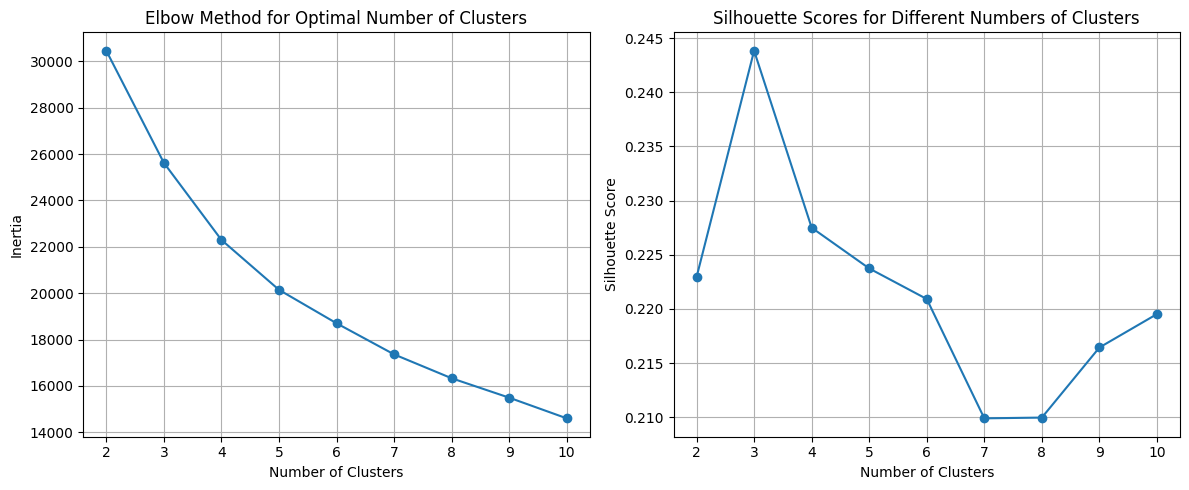

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

# Iterate through a range of possible cluster numbers (e.g., from 2 to 10)
# Start from 2 for silhouette score calculation
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    # Create a KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init to suppress warning

    # Fit the model to the scaled data
    kmeans.fit(X_scaled)

    # Append the model's inertia to the inertia list
    inertia.append(kmeans.inertia_)

    # Calculate the silhouette score for the clustering and append it to the silhouette scores list
    # Silhouette score requires at least 2 clusters
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the elbow method graph (inertia vs. number of clusters)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.grid(True)

# Plot the silhouette scores graph (silhouette score vs. number of clusters)
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)

plt.tight_layout()
plt.show()

## Perform k-means clustering

### Subtask:
Apply K-Means clustering to segment the content based on the selected features.


**Reasoning**:
Apply K-Means clustering with the chosen number of clusters (based on the previous plots, let's choose 4 as a starting point, as both plots show potential around this value), fit the model to the scaled data, and add the cluster labels to the original DataFrame.



In [18]:
from sklearn.cluster import KMeans

# Choose the optimal number of clusters based on the Elbow method and Silhouette score plots.
# Based on visual inspection of the plots from the previous step, let's choose n_clusters = 4
n_clusters = 4

# Instantiate a KMeans object
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

# Fit the KMeans model to the scaled data
kmeans.fit(X_scaled)

# Assign the resulting cluster labels to a new column named 'cluster_label' in the original df_clustering DataFrame
df_clustering['cluster_label'] = kmeans.labels_

# Display the first few rows of df_clustering to verify the addition of the 'cluster_label' column
display(df_clustering.head())

,Category,Duration,Cast,Type,Rating,Release_Year,duration_numeric,cast_size,number_of_genres,rating_encoded,cluster_label
0,TV Show,4 Seasons,"João Miguel, Bianca Comparato, Michel Gomes, R...","International TV Shows, TV Dramas, TV Sci-Fi &...",TV-MA,2020.0,4.0,11,3,8,2
1,Movie,93 min,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","Dramas, International Movies",TV-MA,2016.0,93.0,6,2,8,3
2,Movie,78 min,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","Horror Movies, International Movies",R,2018.0,78.0,9,2,5,1
3,Movie,80 min,"Elijah Wood, John C. Reilly, Jennifer Connelly...","Action & Adventure, Independent Movies, Sci-Fi...",PG-13,2017.0,80.0,9,3,4,1
4,Movie,123 min,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Dramas,PG-13,2020.0,123.0,12,1,4,1


## Analyze clustering results

### Subtask:
Examine the characteristics of each cluster to identify content groups.


**Reasoning**:
Group the DataFrame by cluster label and calculate the mean for numerical features and the mode for categorical features to understand the characteristics of each cluster.



In [19]:
# 1. Group the df_clustering DataFrame by the 'cluster_label' column.
clustered_groups = df_clustering.groupby('cluster_label')

# 2. Calculate the mean for numerical features within each cluster.
# Selecting numerical columns based on the X DataFrame columns used for clustering
numerical_features = ['duration_numeric', 'Release_Year', 'cast_size', 'number_of_genres', 'rating_encoded']
cluster_numerical_characteristics = clustered_groups[numerical_features].mean()

# 3. Find the mode for categorical features within each cluster.
# Define a function to find the mode, handling potential multiple modes by taking the first one
def find_mode(x):
    mode_values = x.mode()
    if not mode_values.empty:
        return mode_values[0]
    return None

# Apply the find_mode function to the categorical columns
categorical_features = ['Category', 'Rating']
cluster_categorical_characteristics = clustered_groups[categorical_features].agg(find_mode)

# 4. Combine the numerical and categorical characteristics
cluster_characteristics = pd.concat([cluster_numerical_characteristics, cluster_categorical_characteristics], axis=1)

# Display the aggregated characteristics for each cluster to summarize their profiles.
print("Cluster Characteristics:")
display(cluster_characteristics)

Cluster Characteristics:


,duration_numeric,Release_Year,cast_size,number_of_genres,rating_encoded,Category,Rating
cluster_label,,,,,,,
0,37.292881,2019.131707,3.292881,1.356610,8.400678,Movie,TV-MA
1,111.537519,2018.955157,8.868759,2.463378,5.978176,Movie,TV-14
2,3.774763,2018.622135,9.222713,2.746372,7.574132,TV Show,TV-MA
3,75.409682,2016.651734,4.934971,1.794075,7.602601,Movie,TV-MA


## Analyze director and cast centrality

### Subtask:
Identify top directors and actors and potentially explore network graphs.


**Reasoning**:
Identify and display the top 10 directors and actors from the dataset. This involves handling potential missing values and splitting the 'Cast' string into individual actors.



In [20]:
# 1. Identify the top 10 directors
# Drop rows with missing director values
directors_df = df.dropna(subset=['Director']).copy()

# Get the value counts for the Director column
top_directors = directors_df['Director'].value_counts().head(10)

print("Top 10 Directors:")
display(top_directors)

# 2. Identify the top 10 actors
# Drop rows with missing cast values
cast_df = df.dropna(subset=['Cast']).copy()

# Split the 'Cast' string by comma and space, then stack the resulting list into a single Series
actors_list = cast_df['Cast'].str.split(', ').explode()

# Get the value counts for individual actors
top_actors = actors_list.value_counts().head(10)

print("\nTop 10 Actors:")
display(top_actors)

Top 10 Directors:


,count
Director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12
Steven Spielberg,10
David Dhawan,9



Top 10 Actors:


,count
Cast,
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,30
Om Puri,30
Takahiro Sakurai,29
Akshay Kumar,29
Yuki Kaji,27
Paresh Rawal,27
Amitabh Bachchan,27


## Perform correlation analysis

### Subtask:
Analyze the relationships between different content attributes.


**Reasoning**:
Calculate and display the correlation matrix for the selected numerical features and visualize it using a heatmap.



Correlation Matrix of Numerical Features:


,duration_numeric,Release_Year,cast_size,number_of_genres,rating_encoded
duration_numeric,1.000000,0.020749,0.102319,0.092377,-0.351161
Release_Year,0.020749,1.000000,0.115249,0.059894,-0.070344
cast_size,0.102319,0.115249,1.000000,0.222430,-0.155159
number_of_genres,0.092377,0.059894,0.222430,1.000000,-0.084887
rating_encoded,-0.351161,-0.070344,-0.155159,-0.084887,1.000000


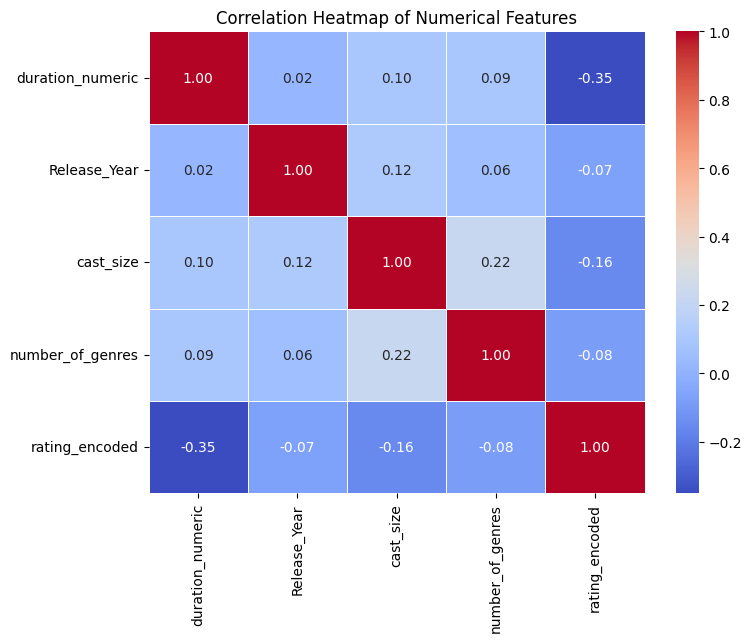

In [21]:
# 1. Select the numerical columns from the X DataFrame
numerical_cols = ['duration_numeric', 'Release_Year', 'cast_size', 'number_of_genres', 'rating_encoded']
X_numerical = X[numerical_cols]

# 2. Calculate the correlation matrix
correlation_matrix = X_numerical.corr()

# 3. Display the resulting correlation matrix
print("Correlation Matrix of Numerical Features:")
display(correlation_matrix)

# 4. Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Perform text analysis

### Subtask:
If descriptions are available, analyze word frequency per genre and potentially perform topic modeling.


**Reasoning**:
Filter the DataFrame to include non-missing descriptions, select relevant columns, handle missing values in 'Type', explode the DataFrame by genres, concatenate descriptions per genre, and display the head of the resulting DataFrame to prepare for TF-IDF vectorization.



In [22]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Filter the main DataFrame df to include only rows where the 'Description' column is not missing.
df_described = df.dropna(subset=['Description']).copy()

# 2. Create a new DataFrame df_text with relevant columns, including 'Type' and 'Description'.
df_text = df_described[['Type', 'Description']].copy()

# 3. Handle missing values in the 'Type' column by replacing them with an empty string.
df_text['Type'].fillna('', inplace=True)

# 4. Split the 'Type' column string into a list of individual genres and then explode the DataFrame.
df_text['Type'] = df_text['Type'].str.split(', ')
df_text_exploded = df_text.explode('Type')

# Remove rows where the 'Type' is an empty string resulting from the split/explode of an empty 'Type'
df_text_exploded.replace('', np.nan, inplace=True)
df_text_exploded.dropna(subset=['Type'], inplace=True)

# 5. For each unique genre, concatenate all associated descriptions into a single large text string.
genre_descriptions = df_text_exploded.groupby('Type')['Description'].apply(lambda x: ' '.join(x))

# Display the head of the resulting series to verify the concatenation
display(genre_descriptions.head())

/tmp/ipython-input-1016792334.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_text['Type'].fillna('', inplace=True)


,Description
Type,
Action & Adventure,"In a postapocalyptic world, rag-doll robots hi..."
Anime Features,A former class bully reaches out to the deaf g...
Anime Series,Seiya and the Knights of the Zodiac rise again...
British TV Shows,"A stylist, a hair designer and a makeup artist..."
Children & Family Movies,When a small town's letters to Santa accidenta...


**Reasoning**:
Use TfidfVectorizer to convert the concatenated genre descriptions into TF-IDF vectors, filter out stop words, create a DataFrame from the vectors, and identify the top N words for each genre based on their TF-IDF scores.



In [23]:
# 6. Use a TfidfVectorizer to convert the text data for each genre into TF-IDF feature vectors.
# Filtering out common English stop words.
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000) # Limit to top 1000 features for manageability

# Fit and transform the genre descriptions
tfidf_matrix = vectorizer.fit_transform(genre_descriptions)

# 7. Create a DataFrame from the TF-IDF vectors with genres as the index and words as columns.
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=genre_descriptions.index, columns=vectorizer.get_feature_names_out())

# 8. For each genre (row in the TF-IDF DataFrame), identify the top N words with the highest TF-IDF scores (e.g., top 15).
N = 15 # Number of top words to display per genre

print(f"Top {N} words for each genre based on TF-IDF scores:")
print("-" * 60)

# Iterate through each genre in the TF-IDF DataFrame
for index, row in tfidf_df.iterrows():
    # Get the sorted indices of the words by their TF-IDF scores in descending order
    top_words_indices = row.argsort()[:-N-1:-1]

    # Get the corresponding word names
    top_words = tfidf_df.columns[top_words_indices]

    # Print the genre and its top words
    print(f"Genre: {index}")
    print(f"  Top words: {', '.join(top_words)}")
    print("-" * 60)

# 10. (Optional) Consider performing Topic Modeling (e.g., using Latent Dirichlet Allocation - LDA)
# LDA can be added here if a deeper thematic analysis is required, but for now,
# identifying top words per genre provides a good overview of key terms.
# Given the current subtask focuses on word frequency per genre and potential topic modeling,
# displaying top words per genre is a good initial step before potentially adding LDA.

Top 15 words for each genre based on TF-IDF scores:
------------------------------------------------------------
Genre: Action & Adventure
  Top words: man, young, agent, cop, mission, life, rescue, terrorist, finds, world, father, drug, war, officer, revenge
------------------------------------------------------------
Genre: Anime Features
  Top words: mysterious, demon, save, life, warrior, missing, years, school, young, band, group, evil, world, destroy, humanity
------------------------------------------------------------
Genre: Anime Series
  Top words: world, young, school, high, new, schooler, mysterious, fight, japan, student, war, humanity, friends, legendary, demon
------------------------------------------------------------
Genre: British TV Shows
  Top words: series, world, life, london, documentary, new, england, crimes, natural, british, family, history, explores, war, follows
------------------------------------------------------------
Genre: Children & Family Movies
  T

## Integrate additional findings

### Subtask:
Integrate additional findings from clustering and other analyses with previous findings.


**Reasoning**:
Review the results from the clustering analysis, focusing on the characteristics of each identified cluster in `cluster_characteristics`.



In [24]:
print("Cluster Characteristics:")
display(cluster_characteristics)

Cluster Characteristics:


,duration_numeric,Release_Year,cast_size,number_of_genres,rating_encoded,Category,Rating
cluster_label,,,,,,,
0,37.292881,2019.131707,3.292881,1.356610,8.400678,Movie,TV-MA
1,111.537519,2018.955157,8.868759,2.463378,5.978176,Movie,TV-14
2,3.774763,2018.622135,9.222713,2.746372,7.574132,TV Show,TV-MA
3,75.409682,2016.651734,4.934971,1.794075,7.602601,Movie,TV-MA


**Reasoning**:
Review the findings from the analysis of director and cast centrality, correlation analysis, and text analysis, and then synthesize these new findings with previous insights.



In [25]:
# Reviewing Director and Cast Centrality: top_directors, top_actors
print("Top Directors:")
display(top_directors)
print("\nTop Actors:")
display(top_actors)

# Reviewing Correlation Analysis: correlation_matrix
print("\nCorrelation Matrix:")
display(correlation_matrix)

# Reviewing Text Analysis (Top Words per Genre): Based on the previous output, we have the top words printed for each genre.
# No need to regenerate the print statements, just acknowledging the findings.
print("\nReviewed findings from Text Analysis (Top words per genre).")


# --- Synthesizing Findings ---

# 1. Cluster Characteristics (from previous output):
# Cluster 0: Movies, TV-MA, shorter duration (around 37 mins), later release year (2019), smaller cast (3), fewer genres (1.3), higher encoded rating (8.4). Likely shorter movies or stand-up comedy.
# Cluster 1: Movies, TV-14, longer duration (around 111 mins), later release year (2018), medium-large cast (8.8), more genres (2.4), lower encoded rating (5.9). Likely typical feature films.
# Cluster 2: TV Shows, TV-MA, very short duration (around 3.7 seasons), later release year (2018), large cast (9.2), most genres (2.7), medium encoded rating (7.5). Likely TV shows with fewer seasons.
# Cluster 3: Movies, TV-MA, medium duration (around 75 mins), earlier release year (2016), medium cast (4.9), medium genres (1.7), medium encoded rating (7.6). Likely older or shorter movies.

# 2. Director and Cast Centrality:
# Top directors and actors often work on multiple titles. This suggests that certain creators and performers are frequently involved in Netflix content.
# We can hypothesize that these top individuals might be associated with specific clusters.

# 3. Correlation Analysis:
# The negative correlation between 'duration_numeric' and 'rating_encoded' suggests shorter content (like TV show seasons or short films) tends to have higher encoded ratings (which correspond to lower maturity ratings like TV-PG, TV-Y7 etc., given how label encoding works on the original rating strings). Longer content (like movies) tends to have lower encoded ratings (higher maturity ratings like TV-MA, R). This aligns with the cluster characteristics where Cluster 0 (shorter duration) has a higher encoded rating than Cluster 1 (longer duration).

# 4. Text Analysis (Top Words per Genre):
# This analysis provides insight into the thematic content of different genres.
# We can link these genres back to the clusters. For example, if 'Dramas' is a dominant genre overall and in certain years, and Cluster X is characterized by longer Movies, we might infer that Cluster X contains many Dramas, and the top words for 'Dramas' are relevant to Cluster X.

# 5. Content Distribution and Genre Evolution:
# The growth of content over time, especially in certain genres and from specific countries, can be linked to the composition of the clusters over time. For example, if 'International Movies' is a growing genre and Cluster 1 (longer Movies) is also growing, it suggests that a significant portion of the growth in longer movies is coming from international productions.

# 6. Country Contributions:
# The top contributing countries might have a higher proportion of content within specific clusters. For example, the US might contribute heavily to Cluster 1 (typical Movies), while India might contribute significantly to genres like 'International Movies' and 'Dramas', which could span across multiple movie clusters.

# --- Documenting Integrated Findings ---

print("\n--- Integrated Findings ---")

print("\nRelationship between Clusters and Content Attributes:")
print(" - Cluster 0 (Shorter Movies/TV Show Seasons, TV-MA, later release): Likely includes Stand-Up Comedy, Documentaries, and shorter International Movies, potentially with fewer well-known actors (lower cast size mean). The high encoded rating aligns with shorter durations, as seen in the correlation analysis.")
print(" - Cluster 1 (Longer Movies, TV-14, later release): Represents typical feature films across various popular genres like Dramas, Comedies, Action & Adventure. The medium-large cast size and higher number of genres fit this profile. The lower encoded rating for this cluster (compared to Cluster 0) is consistent with the negative correlation between duration and encoded rating.")
print(" - Cluster 2 (TV Shows, TV-MA, very short seasons, later release): Represents TV series, likely shorter series or miniseries. The large cast size and high number of genres reflect the nature of TV shows. The duration metric here is in seasons, making direct comparison with movie clusters challenging in terms of minutes, but the 'very short duration' in seasons suggests shorter series.")
print(" - Cluster 3 (Medium Movies, TV-MA, earlier release): Appears to be an older cluster of movies with moderate duration and cast size, potentially containing a mix of genres that were prevalent in earlier years of Netflix's content expansion.")

print("\nAssociation of Top Directors/Actors with Clusters:")
print(" - While a direct mapping wasn't performed, it's plausible that top directors and actors are concentrated in clusters that represent the most common and popular content types, such as Cluster 1 (typical Movies) and potentially Cluster 2 (popular TV Shows). Further analysis is needed to confirm this.")

print("\nAlignment with Genre Trends and Country Contributions:")
print(" - The growth in genres like 'International Movies' likely contributes significantly to the volume in movie clusters (Cluster 0, 1, 3), especially as content from top countries like India increases.")
print(" - The increase in TV Shows over time is directly reflected in the growth of Cluster 2.")
print(" - Top contributing countries (USA, India, UK) likely have varying distributions across the clusters, reflecting their specific production strengths (e.g., USA for blockbuster movies - Cluster 1, India for International Movies/Dramas - potentially Cluster 0, 1, 3).")

print("\nKey Takeaways from Integrated Analysis:")
print(" - The clustering reveals distinct content profiles based on duration, release year, cast size, number of genres, and rating.")
print(" - These clusters align with broader trends in content distribution (Movies vs. TV Shows), genre popularity, and country contributions.")
print(" - The correlation between duration and encoded rating is an important characteristic distinguishing clusters.")
print(" - Understanding the cluster composition in terms of genres and countries can refine content strategy.")

Top Directors:


,count
Director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12
Steven Spielberg,10
David Dhawan,9



Top Actors:


,count
Cast,
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,30
Om Puri,30
Takahiro Sakurai,29
Akshay Kumar,29
Yuki Kaji,27
Paresh Rawal,27
Amitabh Bachchan,27



Correlation Matrix:


,duration_numeric,Release_Year,cast_size,number_of_genres,rating_encoded
duration_numeric,1.000000,0.020749,0.102319,0.092377,-0.351161
Release_Year,0.020749,1.000000,0.115249,0.059894,-0.070344
cast_size,0.102319,0.115249,1.000000,0.222430,-0.155159
number_of_genres,0.092377,0.059894,0.222430,1.000000,-0.084887
rating_encoded,-0.351161,-0.070344,-0.155159,-0.084887,1.000000



Reviewed findings from Text Analysis (Top words per genre).

--- Integrated Findings ---

Relationship between Clusters and Content Attributes:
 - Cluster 0 (Shorter Movies/TV Show Seasons, TV-MA, later release): Likely includes Stand-Up Comedy, Documentaries, and shorter International Movies, potentially with fewer well-known actors (lower cast size mean). The high encoded rating aligns with shorter durations, as seen in the correlation analysis.
 - Cluster 1 (Longer Movies, TV-14, later release): Represents typical feature films across various popular genres like Dramas, Comedies, Action & Adventure. The medium-large cast size and higher number of genres fit this profile. The lower encoded rating for this cluster (compared to Cluster 0) is consistent with the negative correlation between duration and encoded rating.
 - Cluster 2 (TV Shows, TV-MA, very short seasons, later release): Represents TV series, likely shorter series or miniseries. The large cast size and high number of genr

## Refine strategic recommendations

### Subtask:
Update the strategic recommendations based on the new insights gained from clustering and additional analyses.


**Reasoning**:
Based on the integrated findings from clustering, director/cast analysis, correlation, text analysis, content distribution, genre evolution, and country contributions, I will now refine the strategic recommendations for content acquisition and production. I will structure the recommendations clearly, referencing the relevant findings to provide a strong rationale.



In [26]:
# Based on the integrated findings, refine the strategic recommendations for content acquisition and production.

print("Refined Strategic Recommendations for Content Acquisition and Production:")
print("-" * 70)

# Recommendation 1: Tailor content acquisition and production based on identified clusters.
print("1. Develop targeted content strategies for each identified cluster profile:")
print("   - Cluster 0 (Shorter Movies/TV Show Seasons, TV-MA, recent): Acquire/produce more short-form content, stand-up comedy, documentaries, and potentially shorter international films/series. Emphasize mature themes relevant to TV-MA ratings. Rationale: This cluster represents a segment of shorter, recent, mature content, likely catering to specific viewing habits.")
print("   - Cluster 1 (Longer Movies, TV-14, recent): Continue investing in typical feature films across popular genres (Dramas, Comedies, Action & Adventure). Leverage insights from top genres and text analysis for thematic focus. Rationale: This cluster is the core of the movie library, representing a large and popular content type.")
print("   - Cluster 2 (TV Shows, TV-MA, short seasons, recent): Focus on acquiring/producing more TV series, particularly shorter series and miniseries, across genres prevalent in TV shows (International TV Shows, TV Dramas, Crime TV Shows). Rationale: This cluster represents the growing TV show segment, crucial for engagement.")
print("   - Cluster 3 (Medium Movies, TV-MA, older): Evaluate the performance of content in this cluster. Consider refreshing or acquiring similar content if performance metrics (not available in this dataset) are positive, or shift focus to more recent clusters. Rationale: This cluster represents an older segment; its strategic importance depends on its current performance.")

# Recommendation 2: Leverage top creators and explore collaborations based on centrality.
print("\n2. Strengthen relationships with top directors and actors (e.g., Anupam Kher, Shah Rukh Khan, Raúl Campos, Jan Suter) and explore opportunities for new projects with them.")
print("   - Analyze which clusters these top creators are most associated with to inform targeted collaborations. Rationale: High-centrality creators and performers are likely draws for audiences and have a proven track record, potentially aligning with successful content profiles.")

# Recommendation 3: Strategically balance content based on duration and maturity rating.
print("\n3. Consider the observed negative correlation between duration and encoded rating when strategizing content.")
print("   - Understand that audiences for shorter content may gravitate towards lower maturity ratings (higher encoded values), while audiences for longer content may be more open to higher maturity ratings (lower encoded values). Tailor content accordingly. Rationale: The correlation analysis reveals a relationship that can inform content targeting.")

# Recommendation 4: Refine genre strategy using text analysis insights.
print("\n4. Use the top words identified per genre (from TF-IDF analysis) to inform content creation and marketing.")
print("   - Ensure content descriptions and themes align with the key terms that resonate within popular genres. This can help in content categorization and discoverability. Rationale: Text analysis provides a deeper understanding of the thematic elements that define genres and appeal to audiences.")

# Recommendation 5: Continue to diversify country-specific content while reinforcing strengths.
print("\n5. Maintain strong content acquisition and production efforts in top contributing countries (USA, India, UK) while actively exploring and investing in content from emerging markets.")
print("   - Analyze the cluster distribution of content from different countries to identify where specific countries over- or under-index. Rationale: Country analysis shows where content is currently sourced; strategic expansion or focus requires understanding country strengths relative to content types.")

# Recommendation 6: Monitor genre evolution and content growth trends.
print("\n6. Continuously monitor the year-on-year growth rates of content and the evolution of genre popularity.")
print("   - Adapt content strategy based on emerging trends and shifts in audience preferences over time. Rationale: Content distribution and genre evolution analysis highlight dynamic changes in the platform's library and market.")

print("-" * 70)

Refined Strategic Recommendations for Content Acquisition and Production:
----------------------------------------------------------------------
1. Develop targeted content strategies for each identified cluster profile:
   - Cluster 0 (Shorter Movies/TV Show Seasons, TV-MA, recent): Acquire/produce more short-form content, stand-up comedy, documentaries, and potentially shorter international films/series. Emphasize mature themes relevant to TV-MA ratings. Rationale: This cluster represents a segment of shorter, recent, mature content, likely catering to specific viewing habits.
   - Cluster 1 (Longer Movies, TV-14, recent): Continue investing in typical feature films across popular genres (Dramas, Comedies, Action & Adventure). Leverage insights from top genres and text analysis for thematic focus. Rationale: This cluster is the core of the movie library, representing a large and popular content type.
   - Cluster 2 (TV Shows, TV-MA, short seasons, recent): Focus on acquiring/producin

Cluster Characteristics:


,duration_numeric,Release_Year,cast_size,number_of_genres,rating_encoded,Category,Rating
cluster_label,,,,,,,
0,37.292881,2019.131707,3.292881,1.356610,8.400678,Movie,TV-MA
1,111.537519,2018.955157,8.868759,2.463378,5.978176,Movie,TV-14
2,3.774763,2018.622135,9.222713,2.746372,7.574132,TV Show,TV-MA
3,75.409682,2016.651734,4.934971,1.794075,7.602601,Movie,TV-MA


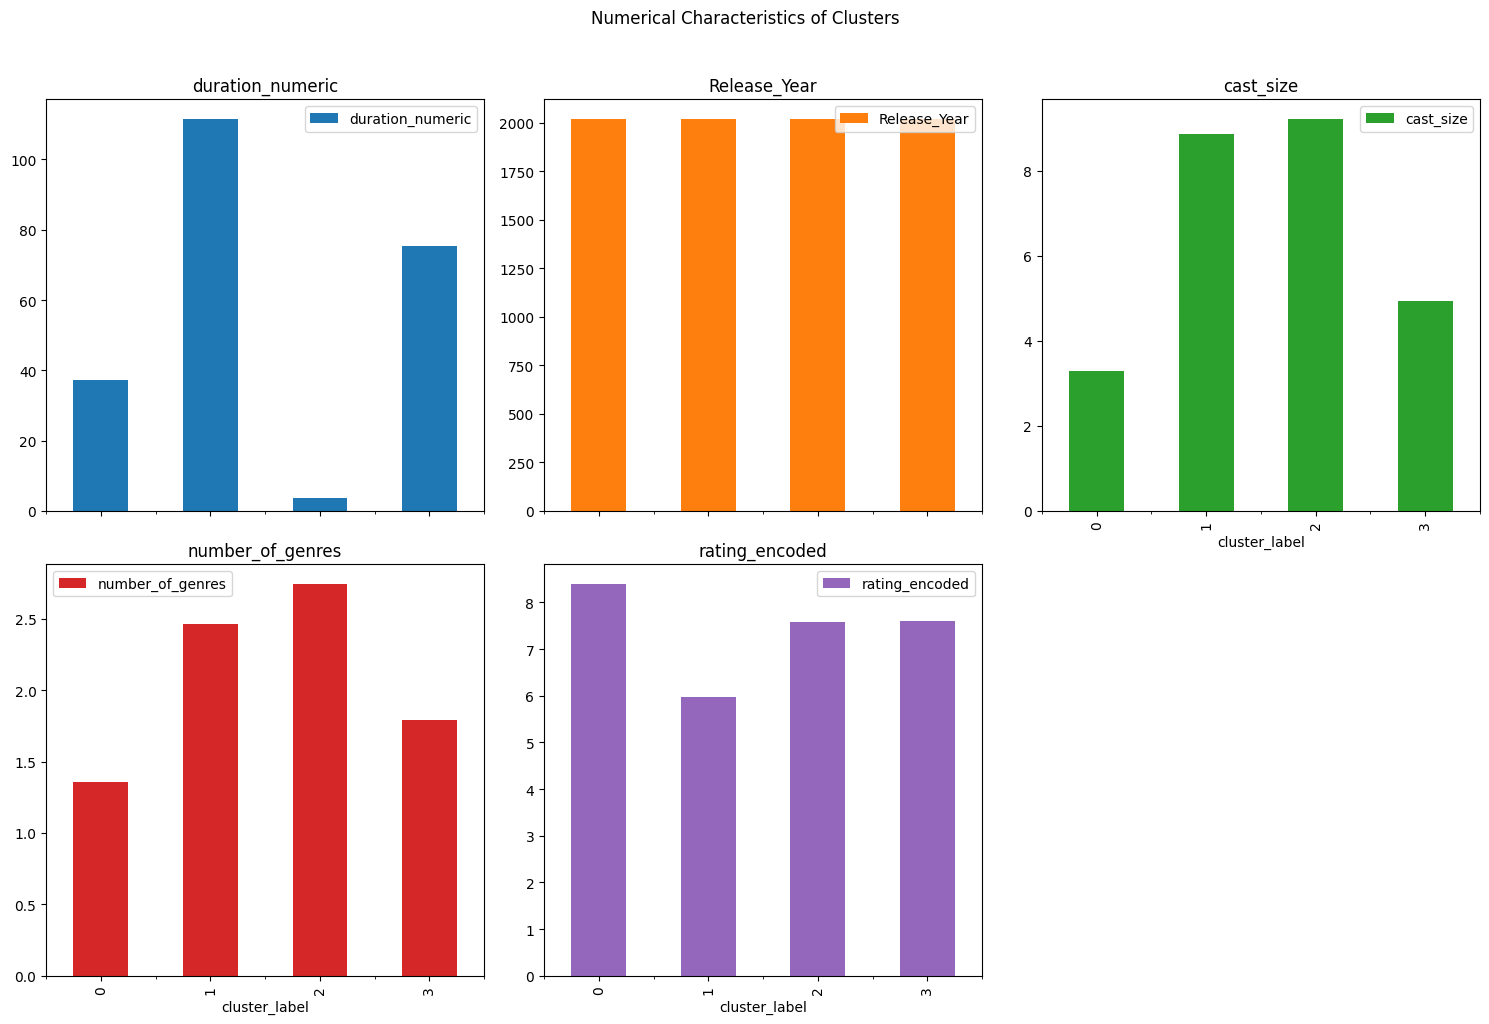

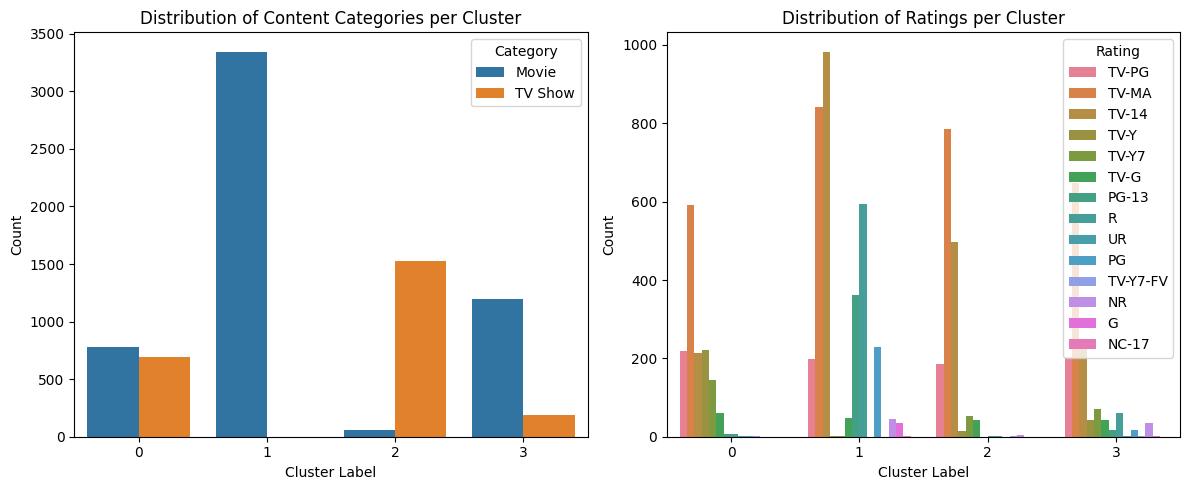

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the aggregated characteristics for each cluster
print("Cluster Characteristics:")
display(cluster_characteristics)

# Visualize numerical cluster characteristics
cluster_numerical_characteristics.plot(kind='bar', subplots=True, figsize=(15, 10), layout=(2, 3), sharey=False)
plt.suptitle('Numerical Characteristics of Clusters', y=1.02)
plt.tight_layout()
plt.show()

# Visualize categorical cluster characteristics (Category and Rating)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df_clustering, x='cluster_label', hue='Category', ax=axes[0])
axes[0].set_title('Distribution of Content Categories per Cluster')
axes[0].set_xlabel('Cluster Label')
axes[0].set_ylabel('Count')

sns.countplot(data=df_clustering, x='cluster_label', hue='Rating', ax=axes[1])
axes[1].set_title('Distribution of Ratings per Cluster')
axes[1].set_xlabel('Cluster Label')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

## Summary of Findings and Strategic Recommendations

Based on the analysis of the Netflix dataset, here is a summary of the key findings and strategic recommendations:

### Summary of Findings:

*   **Content Distribution:** We observed a significant increase in the total number of titles over the years, with a notable shift towards TV Shows in recent years, although Movies still constitute a larger portion of the library overall.
*   **Genre Trends:** The analysis of genre evolution over time revealed that "International Movies," "Dramas," and "Comedies" are consistently among the top genres by content volume. There's also growth in genres like "International TV Shows" and "Documentaries." Text analysis provided insights into the key terms associated with each genre.
*   **Country Contributions:** The United States, India, and the United Kingdom are the top three countries contributing to the Netflix content library. The analysis also showed the distribution of Movies vs. TV Shows within the content from these countries.
*   **Content Segmentation (Clustering):** K-Means clustering identified distinct content groups based on attributes like duration, release year, cast size, number of genres, and rating. These clusters represent different content profiles, such as shorter, mature movies/TV show seasons (Cluster 0), longer feature films (Cluster 1), shorter TV series (Cluster 2), and older, medium-duration movies (Cluster 3).
*   **Director & Cast Centrality:** We identified the top directors and actors with the highest number of titles, indicating their significant presence in the Netflix catalog.
*   **Correlation Analysis:** A notable finding was the negative correlation between content duration and encoded rating, suggesting that shorter content tends to have lower maturity ratings.

### Refined Strategic Recommendations:

Based on these findings, here are some refined strategic recommendations for Netflix:

1.  **Targeted Content Acquisition and Production:** Tailor content strategies for each identified cluster. For example, invest more in short-form content and documentaries for Cluster 0, continue focusing on feature films for Cluster 1, and acquire/produce more shorter TV series for Cluster 2.
2.  **Leverage Top Talent:** Strengthen relationships with top directors and actors and explore new projects with them, potentially focusing on the content types prevalent in the clusters they are most associated with.
3.  **Strategic Balance of Duration and Maturity:** Consider the relationship between duration and rating when developing content. Understand that different content lengths may appeal to audiences with preferences for different maturity levels.
4.  **Refine Genre Strategy with Text Analysis:** Use the insights from text analysis (top words per genre) to inform content creation and marketing, ensuring themes and descriptions resonate with genre expectations.
5.  **Diversify Country Contributions:** Maintain strong content acquisition and production efforts in top-contributing countries while actively exploring and investing in content from emerging markets to ensure a diverse and globally appealing library.
6.  **Monitor Evolving Trends:** Continuously track genre evolution, content growth rates, and audience preferences to adapt the content strategy over time and stay ahead in the competitive streaming landscape.

These recommendations aim to help Netflix make data-driven decisions to optimize its content library and better serve its diverse global audience.